In [33]:
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import docx
from slugify import slugify
import pickle
from unicodedata import normalize

In [4]:
def getFiles():
    files = {
    '2017_1_doc' : glob("docs/originals/2017.1/*.doc"),
    '2017_1_docx' : glob("docs/originals/2017.1/*.docx"),
    '2017_1_odt' : glob("docs/originals/2017.1/*.odt"),
    '2017_1_pdf' : glob("docs/originals/2017.1/*.pdf"),
    '2017_1_rtf' : glob("docs/originals/2017.1/*.rtf"),
    '2017_2_doc' : glob("docs/originals/2017.2/*.doc"),
    '2017_2_docx' : glob("docs/originals/2017.2/*.docx"),
    '2017_2_odt' : glob("docs/originals/2017.2/*.odt"),
    '2017_2_pdf' : glob("docs/originals/2017.2/*.pdf"),
    '2017_2_rtf' : glob("docs/originals/2017.2/*.rtf"),
    '2018_1_doc' : glob("docs/originals/2018.1/*.doc"),
    '2018_1_docx' : glob("docs/originals/2018.1/*.docx"),
    '2018_1_odt' : glob("docs/originals/2018.1/*.odt"),
    '2018_1_pdf' : glob("docs/originals/2018.1/*.pdf"),
    '2018_1_rtf' : glob("docs/originals/2018.1/*.rtf"),  
    }
    return files

    

In [8]:
def plotFiles(files):
    name=[]
    count_files = []
    for x in sorted(files):
        name.append(x)
        count_files.append(len(files[x]))
        #print(x, len(files[x]),"\n")
    plt.figure(figsize=(15,8))
    fig = sns.barplot(name,count_files,palette='rocket');
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    fig.set_figure;
    

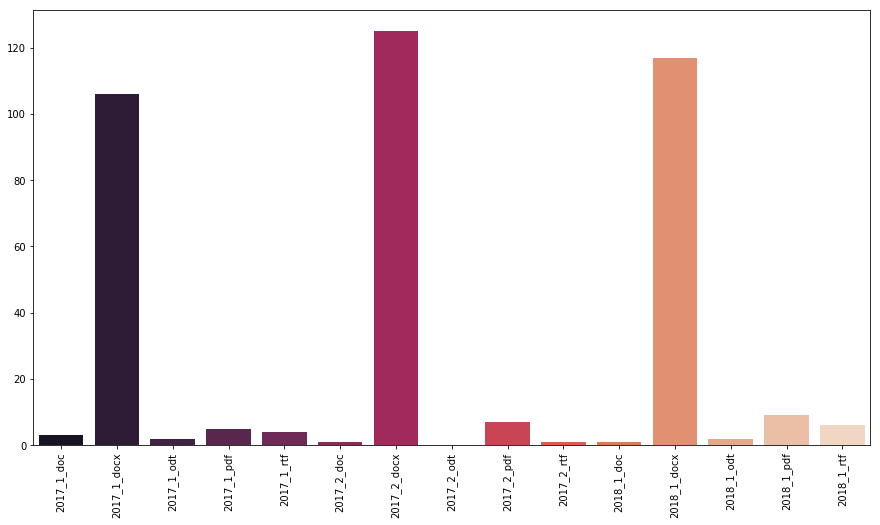

In [9]:
files = getFiles()    
plotFiles(files)

In [28]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(normalize('NFKD', para.text).encode('ASCII', 'ignore').decode('ASCII'))
    text = '\n'.join(fullText)
    return text[100:len(text)-50]

In [29]:
def getLabel(title):
    regex_pattern = r'[^0-9]+'
    label = slugify(title ,max_length=13,regex_pattern=regex_pattern)
    return label

    

In [30]:
label_content = {}
for i in range(0,len(files['2018_1_docx'])):
    title = getLabel(files['2018_1_docx'][i])
    text = getText(files['2018_1_docx'][i])
    label_content[title] = text

In [31]:
with open('label_content_2018_1', 'wb') as f:
    pickle.dump(label_content, f)

In [32]:
with open('label_content_2018_1', 'rb') as f:
    lc_2018_1 = pickle.load(f)

In [34]:
lc_2018_1

{'2018-1-299247': 'Brasil e fundamentalismo e tolerancia. Ja imaginava que o catolicismo sempre foi uma religiao predominante, nao so no Brasil como no mundo. Entretanto, pude notar que o pluralismo religioso e cada vez mais comum. Novas religioes, de origem oriental, por exemplo, estao conseguindo aos poucos conquistar novos seguidores.\nDados mostraram que a participacao das pessoas em instituicoes religiosas vem caindo a cada ano, entretanto, as pessoas nao deixaram de acreditar ou praticar suas preces de acordo com suas crencas. Acredito que a globalizacao tenha contribuido para isso. As pessoas estao cada vez mais sem tempo e fazem, quase tudo, remotamente.\nO dialogo ecumenico foi uma novidade para mim. No meu ponto de vista a religiao e algo unico, cada um tem sua crenca e a forma como a enxerga e diferente do outro. E normalmente e assim, voce busca a religiao em que mais voce se identifica. Apesar de todas praticarem o religioso, o sagrado, ha diferencas de ideias ou ritos. E 